<a href="https://colab.research.google.com/github/sai-teja-ponugoti/Brain-Tumor-Segmentation/blob/main/dev_BRATS_uNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import time
import random
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def getImagePaths(data_path):
    masks_paths = []

    for dir in os.listdir(data_path):
        # excluding readme and data.csv files as they are not used in training
        if dir not in ['README.md', 'data.csv']:
            for file_path in os.listdir(os.path.join("../input/lgg-mri-segmentation/kaggle_3m/",dir)):
                if '_mask' in file_path:
                    masks_paths.append(os.path.join("../input/lgg-mri-segmentation/kaggle_3m/",dir,file_path))

    # replacing '_mask' in masks path to get image paths
    image_paths = [path.replace("_mask",'') for path in masks_paths]
    
    print("Total number of images found: ",len(image_paths))
    print("Total number of masks found: ",len(image_paths))
    
    # converting to dataframe as flow_from_dataframe requires dataframe as input
    return pd.DataFrame({"images": image_paths}), pd.DataFrame({"masks":masks_paths})

In [ ]:
def displayImageMask(image_paths, masks_paths, num_image_pairs):
    print("Displaying random image and mask pairs")
    for i in random.sample(range(0, len(train_paths)), num_image_pairs):
#         print(image_paths["images"][i])
#         print(masks_paths["masks"][i])
        image = Image.open(image_paths["images"][i])
        mask = Image.open(masks_paths["masks"][i])
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
        ax1.imshow(image)
        ax2.imshow(mask)
        

In [ ]:
def splitData(image_paths, masks_paths, test_size=0.2, random_state=42):
    # splitting the data into train and validation sets
    return train_test_split(image_paths, masks_paths, test_size = test_size, random_state = random_state)

In [ ]:
def dataGenCreator(images, masks, args_dict, image_col, paths_col):
    
    # Provide the same seed and keyword arguments to the fit and flow methods
    seed = 1

    image_datagen = ImageDataGenerator(**args_dict)
    mask_datagen = ImageDataGenerator(**args_dict)

    image_generator = image_datagen.flow_from_dataframe(images, x_col = image_col, class_mode=None,seed=seed)

    mask_generator = mask_datagen.flow_from_dataframe(masks, x_col = paths_col, class_mode=None, seed=seed)

    # combine generators into one which yields image and masks
    return zip(image_generator, mask_generator)
    

Total number of images found:  3929
Total number of masks found:  3929
Displaying random image and mask pairs
Size of train set:  2750
Size of validation set:  943
Size of test set:  236
Train data generator:-
Found 2750 validated image filenames.
Found 2750 validated image filenames.
Validation data generator:-
Found 943 validated image filenames.
Found 943 validated image filenames.
Test data generator:-
Found 236 validated image filenames.
Found 236 validated image filenames.


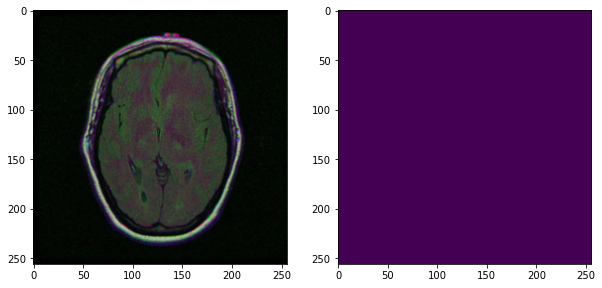

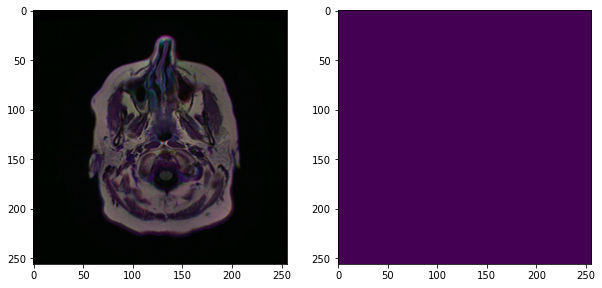

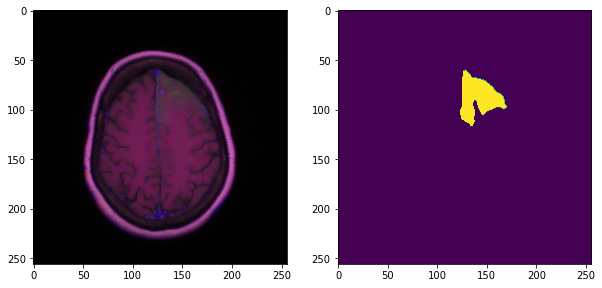

In [ ]:
data_path = "../input/lgg-mri-segmentation/kaggle_3m/"

image_paths, masks_paths = getImagePaths(data_path)

displayImageMask(image_paths,masks_paths, 3)
train_images, val_images, train_masks, val_masks = splitData(image_paths, masks_paths, test_size = 0.3)
val_images, test_images, val_masks, test_masks = splitData(val_images, val_masks, test_size = 0.2)

print("Size of train set: ",train_images.shape[0])
print("Size of validation set: ",val_images.shape[0])
print("Size of test set: ",test_images.shape[0])


# we create two instances with the same arguments
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)

print("Train data generator:-")
train_data_generator = dataGenCreator(train_images, train_masks, data_gen_args, "images", "masks")
print("Validation data generator:-")
validation_data_generator = dataGenCreator(val_images, val_masks, data_gen_args, "images", "masks")
print("Test data generator:-")
test_data_generator = dataGenCreator(test_images, test_masks, data_gen_args, "images", "masks")